
# Proyecto 1 Cosmología

### Laura del Carmen Cabal Paramo




##Parte 1

Para obtener la solución numérica, usaremos el método de Euler.
Para el código nos basamos del libro Numerical Analysis - Burden Faires - 9th Edition

La ecuación que también encontramos en el reporte es:



> $\dot{a} Ho^-1 = ( \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}$

> $\frac{da}{dt} Ho^-1 = ( \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}$

> $\frac{da}{ \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}} = Ho  dt$

Donde: 

$\Omega_m$ = 0.3153

$\Omega_r $ = 9x10^-5

$\Omega_\Lambda$ =0.6847

Ho = 67.36 km/(s*Mpc)





> De referencia además del libro Ryden, un video en youtube : https://www.youtube.com/watch?v=d5IEGyEJYkk&t=2564s



In [91]:
#Para el método de Euler necesitamos:
# Ecuación da = dt * (67.36)*(0.3153/a + (0.00009)/a**2 + 0.6847*a**2)**0.5
#Intervalo de Tiempo t(0, 13.7x10^9)
#Condición Inicial: Sabemos que a(t=0) = 0 
#Sabemos también que al día de hoy a(t=13.7x10^9) = 1

In [92]:
a = 0#0.05#0 #e6
b = 1#13700#1 #e6
#Poner intervalos de tiempo muy grandes eventalmente lleva a error y a valores de a(t) muy grandes
# por lo tanto mejor el tiempo lo multiplicaremos por 13.7*10^9 para tener el intervalo (0, 13.7*10^9)
N = 1000
Cond_Inicial = 0.01#2.9e-4 #0.01
h = ((b-a)/ N)
print(h)

0.001


In [93]:
import math 
h_0= 68*3600*21*365*10**6
Ho = h_0/(3.086e19)
print(Ho)
t = a
w = Cond_Inicial
w_a = [Cond_Inicial]
t_a = [a]
for i in range(1,N+1):
  w = (w + h*((0.3153/w) + (0.00009/w**2) + (0.6847*w**2) + (1 - 0.96409))**0.5) #Por alguna extraña razón si meto Ho aquí, aparece error de Overflow el cual tengo entendido que es por que salen números muy grandes
  #Aqui en otro intento más, pasamos Ho a otras unidades y multiplicamos la ecuacion por este Ho para que no salieran tan grandes los numeros
  t = (a + i*h)*13.7e9 #1*10**6#*13.7e9 #*67.36
  t_a.append(t)
  w_a.append(w)
#Me di cuenta que multiplicando por t = 13.7x10^9 tenemos valores de a(t) con respecto a t en años, ya que nuestro t = (0,1)
#Donde t de 0 a 1 representa la edad del universo (Creo y espero)

6.0803370058327935e-05


Nota Importante:
Debido al modelo baseline que estamos tomando para hacer este problema, en un inicio no consideré el término para la curvatura, ya que en este modelo, k=0 pero tambien en el libro se menciona que a pesar de esto, no podemos asegurar que sea totalmente 0, por lo que debemos agregar a nuestra ecuacion un $(1- \Omega_{0})$ El cual, siguiendo el libro y para comparar resultados, tambien se tomará como $ \Omega_{0} =0.96409$ que es la suma de todas nuestras densidades

Otra Nota importante: Se realizó un intento donde Ho se pasaron a otras unidades, se cambiaron los límites de 0.05 a 13700 con condicion inicial 2.9e-4 que es la epoca de igualdad de radiación materia y el tiempo se multiplicó por 1x10e6  para obtener la gráfica, pero en 13.7x10e9 nno se coincide en 1, coincide mas bien en 0.9

In [94]:
print((w_a))
print((t_a)) 

[0.01, 0.01569789245862012, 0.020224127311054902, 0.024204896109175117, 0.027840307663871876, 0.031228207192031586, 0.034425941935096405, 0.03747084789510309, 0.04038898297777775, 0.04319946033218447, 0.04591683343592359, 0.048552512400850026, 0.051115655447125125, 0.05361375657999297, 0.056053047860729434, 0.05843878351695195, 0.06077544597529824, 0.06306689869523044, 0.06531650178682286, 0.06752720098992174, 0.0697015971983436, 0.07184200152033574, 0.07395047941399355, 0.0760288864522071, 0.07807889759144152, 0.08010203133985844, 0.08209966987773701, 0.0840730759344097, 0.0860234070428295, 0.08795172765641655, 0.0898590195099428, 0.09174619052781322, 0.09361408252277212, 0.09546347788121139, 0.09729510539456213, 0.0991096453672801, 0.10090773410889223, 0.10268996789911364, 0.10445690650016366, 0.10620907627833527, 0.10794697298702083, 0.1096710642553122, 0.11138179181962496, 0.11307957353026823, 0.11476480516027746, 0.11643786203997529, 0.11809910053748945, 0.11974885940272578, 0.121

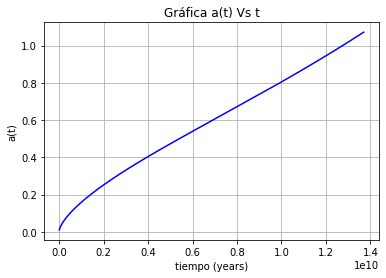

In [95]:
import matplotlib.pyplot as plt
plt.xlabel('tiempo (years)')  #eje x
plt.ylabel('a(t)')       #eje y
plt.plot(t_a, w_a, 'b-')
plt.plot(10.2e9, 0.77, 'r')
#título de la gráfica
plt.title('Gráfica a(t) Vs t')
plt.grid()
#plt.axis([0,14e9,0,1.2])

plt.show()

In [96]:
for i in range(len(w_a)):
  w_a[i] = round(w_a[i],5)
print(w_a)
pos= w_a.index(0.77045)
print(pos)
#a(t)=0.77 está en la posicion 693
tpos = t_a[693]
print(tpos)
#Este valor de a está en el tiempo 9.49x10^9

[0.01, 0.0157, 0.02022, 0.0242, 0.02784, 0.03123, 0.03443, 0.03747, 0.04039, 0.0432, 0.04592, 0.04855, 0.05112, 0.05361, 0.05605, 0.05844, 0.06078, 0.06307, 0.06532, 0.06753, 0.0697, 0.07184, 0.07395, 0.07603, 0.07808, 0.0801, 0.0821, 0.08407, 0.08602, 0.08795, 0.08986, 0.09175, 0.09361, 0.09546, 0.0973, 0.09911, 0.10091, 0.10269, 0.10446, 0.10621, 0.10795, 0.10967, 0.11138, 0.11308, 0.11476, 0.11644, 0.1181, 0.11975, 0.12139, 0.12302, 0.12463, 0.12624, 0.12784, 0.12942, 0.131, 0.13257, 0.13413, 0.13568, 0.13722, 0.13875, 0.14028, 0.1418, 0.14331, 0.14481, 0.1463, 0.14779, 0.14927, 0.15074, 0.1522, 0.15366, 0.15512, 0.15656, 0.158, 0.15943, 0.16086, 0.16228, 0.16369, 0.1651, 0.1665, 0.1679, 0.16929, 0.17068, 0.17206, 0.17343, 0.1748, 0.17617, 0.17753, 0.17889, 0.18024, 0.18158, 0.18292, 0.18426, 0.18559, 0.18692, 0.18824, 0.18956, 0.19087, 0.19218, 0.19349, 0.19479, 0.19608, 0.19738, 0.19867, 0.19995, 0.20123, 0.20251, 0.20379, 0.20506, 0.20632, 0.20759, 0.20885, 0.2101, 0.21135, 0.212

Jugando con el término de curvatura y haciendo $\Omega_{0}$ =1.1 que es para curvatura positiva.

a=0.77 ocurre en un tiempo 10.001

Cuando el real es $a=0.77$ en $t=10.2x10^9$

Y como observamos de nuestra celda anterior, para la $\Omega_{0}$ =0.96409 que es curvatura plana o 0, nos da "peor" ya que así:

$a=0.77$ en $t=9.5x10^9$

 Update 1: Este resultado me causaba conflicto ya que la manera en que intenté resolverlo no se si sea adecuado o posible hacerlo asi, por lo que intentaré resolverlo de forma interal, es decir:


> $\frac{da}{dt} Ho^-1 = ( \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}$

> $\int_{0}^{1}\frac{da}{ \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}} = \int_{0}^{t} Ho  dt$

> $\int_{0}^{1}\frac{da}{ \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}} = Ho t$

Update 2: Creo que por el método de Euler queda más entendible y se parece a las gráficas del libro Ryden, proseguiré a usar los resultados anteriores



1.1587975393560381
1001
1001


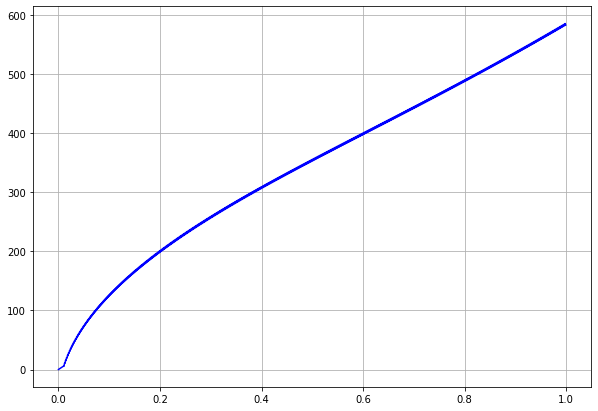

In [196]:
#Como integral:
#Método Composite Simpson #Código nuevamente del mismo libro Numerical Analysis - Burden Faires - 9th Edition
import numpy as np

a = 0.01
b = 1
n=1000
h=(b-a)/n
f= (((0.3153/a) + (0.00009/a**2) + (0.6847*a**2))**0.5) + (((0.3153/b) + (0.00009/b**2) + (0.6847*b**2))**0.5)
XI = [f,0,0]
aX = [0]
xxt=[0]
t = np.linspace(0,13.7e9,98,endpoint=True)
for i in range(n):
  X=a+i*h
  if (i%2 == 0):
    XI[2]+= (((0.3153/X) + (0.00009/X**2) + (0.6847*X**2))**0.5)
    aX.append(XI[2])
  else:
    XI[1]+= (((0.3153/X) + (0.00009/X**2) + (0.6847*X**2))**0.5)
    aX.append(XI[1])
  xxt.append(X)
XIFinal = h*(XI[0] + 2* XI[2] + 4*XI[1])/3
print(XIFinal)

print(len(aX))
print(len(xxt))
plt.plot(xxt, aX, 'b-')

plt.grid()
plt.show()

Las gráficas tienen la misma forma (ignorando los picos, los cuales se eliminan haciendo n más grande), lo cual me convence un poco más de que puedo utilizar lo que realicé al principio.

Ademas de que en esta gráfica los tiempos no logré acomodarlos de mejor manera en la que se entendiera. Lo que rescato de esto es la forma que tiene a (factor de escala)

Lo siguiente es intento de interpolación. No lo usaremos.

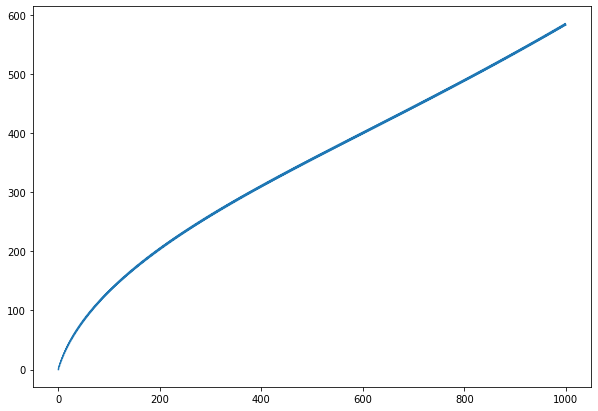

In [197]:
#import scipy
#import scipy.integrate
#scipy.interpolate.interp1d (xxt, aX, kind = 'linear', axis = - 1, copy = True, limits_error = None, fill_value = nan, ass_sorted = False)
plt.plot(np.interp(xxt, xxt, aX, left=None, right=None, period=None))
#My attempt at interpolation didn't work

Sabemos que H(t) = $\frac{\dot a}{a}$

Por lo tanto:

> $\dot{a} =  Ho ( \Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^2 )^{1/2}$


[38724.2, 19585.5, 13373.6, 10202.4, 8262.1, 6950.3, 6001.7, 5284.7, 4720.8, 4266.9, 3892.8, 3580.3, 3313.3, 3084.8, 2885.3, 2709.9, 2554.8, 2416.8, 2292.9, 2181.2, 2080.0, 1987.7, 1903.2, 1825.6, 1754.2, 1688.2, 1626.9, 1570.1, 1517.0, 1467.4, 1420.9, 1377.2, 1336.4, 1297.8, 1261.2, 1226.8, 1194.2, 1163.3, 1133.9, 1106.0, 1079.4, 1054.2, 1030.1, 1007.0, 985.0, 963.8, 943.6, 924.2, 905.6, 887.7, 870.6, 854.1, 838.2, 822.9, 808.1, 793.9, 780.1, 766.9, 754.1, 741.7, 729.6, 718.0, 706.8, 695.9, 685.3, 675.1, 665.1, 655.5, 646.1, 637.0, 628.1, 619.5, 611.1, 603.0, 595.0, 587.3, 579.8, 572.4, 565.3, 558.3, 551.5, 544.9, 538.4, 532.1, 525.9, 519.9, 514.0, 508.2, 502.5, 497.1, 491.7, 486.4, 481.2, 476.2, 471.2, 466.4, 461.7, 457.0, 452.5, 448.0, 443.7, 439.4, 435.2, 431.1, 427.0, 423.0, 419.1, 415.3, 411.6, 407.9, 404.3, 400.7, 397.2, 393.8, 390.4, 387.1, 383.9, 380.7, 377.5, 374.4, 371.4, 368.4, 365.5, 362.6, 359.7, 356.9, 354.2, 351.5, 348.8, 346.2, 343.6, 341.0, 338.5, 336.0, 333.6, 331.2,

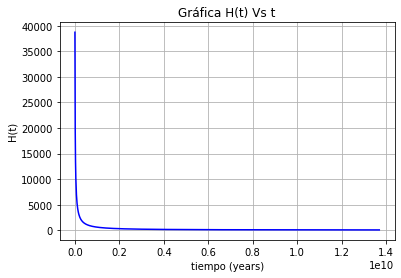

In [99]:
#Espero que esté bien
#Como obtuvimos cosas numéricas, obtendremos varios valores de H(t) para nuestro caso
#Por lo tanto:
Ht = []
for i in range(len(w_a)):
  H=round((68*((0.3153/w_a[i]) + (0.00009/w_a[i]**2) + (0.6847*w_a[i]**2))**0.5)/w_a[i],1)
  Ht.append(H)
print(Ht)
plt.plot(t_a, Ht, 'b-')
plt.grid()
plt.xlabel('tiempo (years)')  #eje x
plt.ylabel('H(t)')       #eje y
#título de la gráfica
plt.title('Gráfica H(t) Vs t')
###########################################
pos= Ht.index(68)
print(pos)
#Ho está en la posicion 92
tpos = t_a[92]
print(tpos)
#En la posición 92 está el tiempo 12604000000.0 años =12.6x10^9

De esta extraña gráfica podemos observar como disminuye H(t) conforme pasa el tiempo.
Como a inicios del universo H(t) era muy grande, esto se puede referir a que la expansión era muy acelerada y actualmente va disminuyendo.

Ho en to=13.7x10^9  = 68 en el modelo de benchmark

Conclusion de la primera parte:
Los resultados varian un poco respecto a los que están en el libro (refiriendome a los a y t ya conocidos como lo son para la igualdad materia radiación y materia lambda), se me ocurren 4 posibles opciones del por qué.



1.   Pueden existir métodos mas exactos que el de Euler
2.   Hay un problema en el intervalo del tiempo o en general de la manpulación del tiempo
3.   Se debió tomar otro tamaño de paso 
4.   Realicé algun error ya sea en la ecuación, en el código del método, etc.





##Parte 2

Make plots of how the energy density of the different matter-energy species
evolves as function of a, z and t.

Para esta parte, tenemos los casos:

1.   Materia
2.   Radiacion
3.   Lambda



IMPORTANTE !!!!

Convertimos nuestra Ho =68km/(Mpc*s)
a Ho = 6.0803370058327935e-05 km/Myr

Para poder tomar los intervalos de tiempo de mejor manera

In [130]:
#Primero inrtentemos sacar el polinomio/ con ayuda de mi compañera Sandra
## INTERPOLACIÓN DE 
import random
import sympy as sym
def lagrange(xL,yL):
  n = len(xL)
  x = sym.Symbol('x') #variable simbólica
  poli = 0
  for i in range(n):
    numerador = 1
    denominador = 1
    for j  in range(n):
      if (j!=i):
        numerador = numerador*(x-xL[j])
        denominador = denominador*(xL[i]-xL[j])
    poli = poli + (numerador/denominador)*yL[i]
  polisimple = sym.expand(poli) #para la expresión simple del polinomio
  px = sym.lambdify(x,poli)     #para evaluación numérica
  return px, polisimple

In [139]:
import random
import sympy as sym
lista = [0, 999]
for i in range(10):
  num = random.randint(1,999)
  lista.append(num)
lista.sort()

#Ejecutar hasta que salga bien, toma varios intentos ya que toma datos random
#Veremos en la gráfica cuando este asemeje

In [201]:
print(lista)
#Datos para los que si funciona: lista = [0, 61, 98, 126, 479, 664, 784, 832, 861, 930, 969, 999]
a2, t2 = [], []
for i in lista:
  a2.append(w_a[i])
  t2.append(t_a[i])

[0, 61, 98, 126, 479, 664, 784, 832, 861, 930, 969, 999]


In [144]:
px, polinomio = lagrange(t2, a2)

In [149]:
px(100)
print(polinomio)
#Debido a que se regeneran varias al compilar nuevamente:
#polireal =5.89577106202795e-110*x**11 - 5.54363272537958e-99*x**10 + 2.29617608373555e-88*x**9 - 5.49998169983441e-78*x**8 + 8.40549662958777e-68*x**7 - 8.52834400734695e-58*x**6 + 5.794987938611e-48*x**5 - 2.6023177394379e-38*x**4 + 7.50628905696984e-29*x**3 - 1.36497459197923e-19*x**2 + 2.32041873001947e-10*x + 0.01


5.89577106202795e-110*x**11 - 5.54363272537958e-99*x**10 + 2.29617608373555e-88*x**9 - 5.49998169983441e-78*x**8 + 8.40549662958777e-68*x**7 - 8.52834400734695e-58*x**6 + 5.794987938611e-48*x**5 - 2.6023177394379e-38*x**4 + 7.50628905696984e-29*x**3 - 1.36497459197923e-19*x**2 + 2.32041873001947e-10*x + 0.01


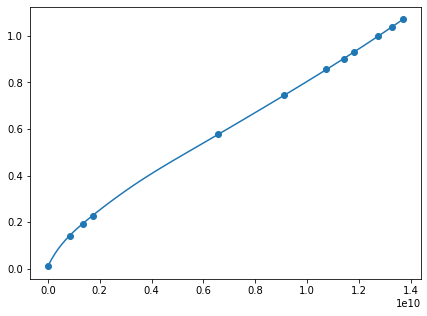

In [146]:
muestras = 101
a = np.min(t2)
b = np.max(t2)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

figure, axes = plt.subplots(1, figsize=(7,5))
plt.scatter(t2, a2, label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')


Gracias a ayuda de mi compañera Sandra, pude encontrar un polinomio para a(t), el cual nos servirá mas adelante, el polinomio es:

5.89577106202795e-110 * x * * 11 - 5.54363272537958e-99 * x * * 10 + 2.29617608373555e-88* x * * 9 - 5.49998169983441e-78 * x * * 8 + 8.40549662958777e-68 * x * * 7 - 8.52834400734695e-58 * x * * 6 + 5.794987938611e-48 * x * * 5 - 2.6023177394379e-38 * x * * 4 + 7.50628905696984e-29 * x * * 3 - 1.36497459197923e-19 * x * * 2 + 2.32041873001947e-10 * x + 0.01


### Caso 1: Materia
Resuelto en clase y en libro, para este caso: w = 0
y en este tenemos tambien:

$t_{0} = \frac{2}{3Ho}$

y con factor de escala:

$a(t) = (\frac{t}{t_{0}})^{2/3}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

10964.304544750421


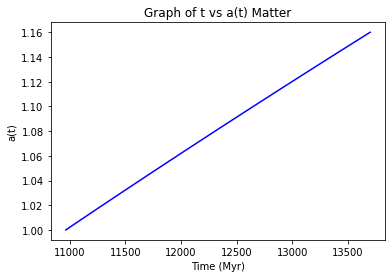

In [ ]:
h_0= 68*3600*21*365*10**6
Ho = h_0/(3.086e19) #km/Myr
#print(Ho)
#Ho=6.9444e-11 #(Ho en gigaaños viene en el libro Ryden) #Ya no lo usé, salían graficas raras 
to=2/(3*Ho)
t = np.linspace(to,13700,100,endpoint = True) #tiempo en intervalo desde la actualidad 
amat=[]
print(to)
for i in range(len(t)):
  at = (t[i] / to)**(2/3)
  amat.append(at)
plt.plot(t,amat,marker='', color="blue")
#print(at)
#print(t)
plt.xlabel("Time (Myr)")
plt.ylabel("a(t)")
plt.title("Graph of t vs a(t) Matter")
plt.show()

Del Ryden vemos que la ecuación 5.9 nos da la relación de densidad con respecto a a, quedando:

$\epsilon_{i}(a) = \epsilon_{i,0} a^{-3(1+\omega_{i})} $

y sabemos que w para la materia es w=0 por lo tanto:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-3} $

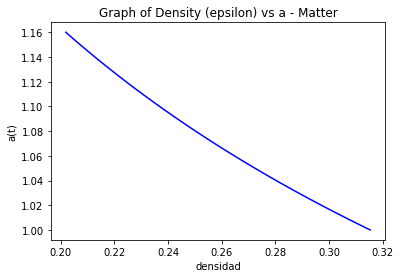

In [ ]:
#Para densidad respecto a a(t) Tenemos:
#h_0= 68*3600*21*365*10**6
Ho = h_0/(3.086e19)
to=2/(3*Ho)
tmat = np.linspace(2/(3*Ho),13700,100,endpoint = True) #tiempo en intervalo desde la actualidad 
e_0 = 0.3153 
e=[]
#y nuestras a(t)
for i in range(len(t)):
  es = e_0/(amat[i]**3)
  e.append(es)
plt.plot(e,amat,marker='', color="blue")
plt.xlabel("densidad")
plt.ylabel("a(t)")
plt.title("Graph of Density (epsilon) vs a - Matter")

plt.show()

Now we want our density $\epsilon$ in terms of time, we can take our last equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-3} $

and vary it along some time:

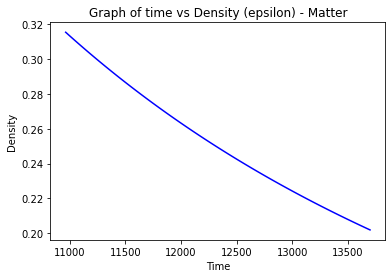

In [ ]:

#We can take our e from last graph:
tt = np.linspace(to,13700,100,endpoint = True)
#so:
plt.plot(tt,e,marker='', color="blue")
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Graph of time vs Density (epsilon) - Matter")

plt.show()

Finally we have density versus z (redshift), we can take the same equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-3} $

And since $ a = \frac{1}{1+z} $
We have:

$ z= (\frac{\epsilon_{m}}{\epsilon_{m,0}})^{1/3} -1  $

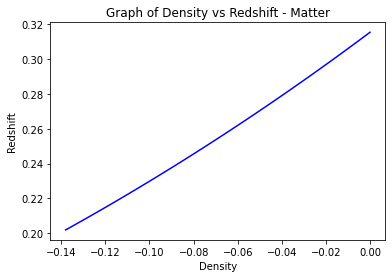

In [ ]:
#We take the same Densitys and now:
zmat=[]
for i in range(len(e)):
  zi = (e[i]/e_0)**(1/3) -1
  zmat.append(zi)

plt.plot(zmat,e,marker='', color="blue")
plt.xlabel("Density")
plt.ylabel("Redshift")
plt.title("Graph of Density vs Redshift - Matter")

plt.show()

There can't be any negative densities so something wrong happened here. But as you can observe, density seems to increase with redshift. I would only take into consideration densities above 0.

### Caso 2: Radiacion
Resuelto en clase y en libro, para este caso: w = 1/3
y en este tenemos tambien:

$t_{0} = \frac{1}{2Ho}$

y con factor de escala:

$a(t) = (\frac{t}{t_{0}})^{1/2}$

8223.228408562816


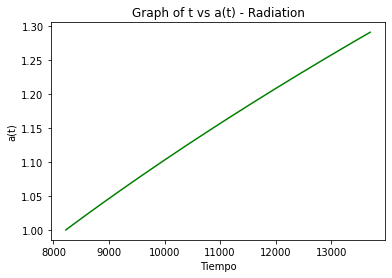

In [ ]:
to=1/(2*Ho) #Ho =68
t = np.linspace(to,13700,1000,endpoint = True) #Endpoint 10000
a=[]
print(to)
for i in range(len(t)):
  at = (t[i]/to)**(1/2)
  a.append(at)
plt.plot(t,a,marker='', color="green")
#print(at)
#print(t)
plt.xlabel("Tiempo")
plt.ylabel("a(t)")
plt.title("Graph of t vs a(t) - Radiation")
plt.show()

Del Ryden vemos que la ecuación 5.9 nos da la relación de densidad con respecto a a, quedando:

$\epsilon_{i}(a) = \epsilon_{i,0} a^{-3(1+\omega_{i})} $

y sabemos que w para la radiacion es w=1/3 por lo tanto:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-4} $

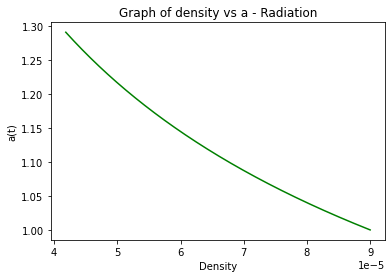

In [ ]:
#Para densidad respecto a a(t) Tenemos:
to=1/(2*Ho) #Ho
t = np.linspace(to,13700,1000,endpoint = True) #tiempo en intervalo desde la actualidad #10000
e_0 = 9e-5
e=[]
#y nuestras a(t)
for i in range(len(t)):
  es = e_0/(a[i]**3)
  e.append(es)
plt.plot(e,a,marker='', color="green")
plt.xlabel("Density")
plt.ylabel("a(t)")
plt.title("Graph of density vs a - Radiation")
plt.show()

Now we want our density $\epsilon$ in terms of time, we can take our last equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-4} $

and vary it along some time:

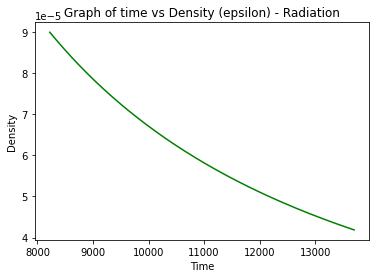

In [ ]:
#We can take our e from last graph:
tt = np.linspace(to,13700,1000,endpoint = True)
#so:
plt.plot(tt,e,marker='', color="green")
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Graph of time vs Density (epsilon) - Radiation")

plt.show()

Finally we have density versus z (redshift), we can take the same equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{-4} $

And since $ a = \frac{1}{1+z} $
We have:

$ z= (\frac{\epsilon_{m}}{\epsilon_{m,0}})^{1/4} -1  $

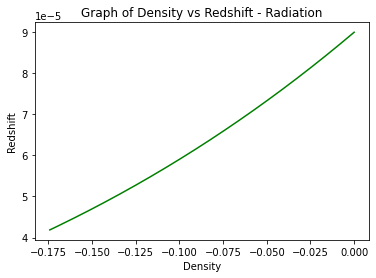

In [ ]:
#We take the same Densitys and now:
z=[]
for i in range(len(e)):
  zi = (e[i]/e_0)**(1/4) -1
  z.append(zi)

plt.plot(z,e,marker='', color="green")
plt.xlabel("Density")
plt.ylabel("Redshift")
plt.title("Graph of Density vs Redshift - Radiation")

plt.show()

We have the same problem, there can't be any negative densities so something wrong happened here. But density seems to increase with redshift. I would only take into consideration densities above 0 again.

### Caso 3: Lambda
En libro, para este caso estamos tomando "a flat, lambda-dominated universe", de la que la ecuación de Friedman toma la forma:

$\dot a ^{2} = \frac{8 \pi G \epsilon_{\Lambda}}{3c^2} a^2$

Donde sustiyuyendo la relación antes usada para nuestra ecuación de Friedman General para Benchmark:

$\dot a ^{2} = H_{0}^{2} a^2$

$\dot a = H_{0} a$

Integrando:

$\int\frac{da}{a} = \int Ho dt$

Quedando entonces:

$a(t) = e^{H_{0}(t-t_{0})}$

0


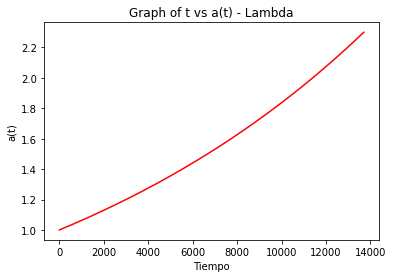

In [ ]:
to=0 #actual
t = np.linspace(to,13700,1000,endpoint = True)
alambda=[]
print(to)
for i in range(len(t)):
  at = math.exp(Ho*(t[i]-to))
  alambda.append(at)

#print(at)
#print(t)
#En el libro la gráfica es de Ho*t por lo que 
#tt=68*t
#print(tt)
plt.plot(t,alambda,marker='', color="red")
plt.xlabel("Tiempo")
plt.ylabel("a(t)")
plt.title("Graph of t vs a(t) - Lambda")

plt.show()

#Por alguna razón sigo notando problemas con los tiempos
#De esta grafica solo observamos el comportamiento exponencial que debe tener la función para el factor de escala respecto a t

Del Ryden vemos que la ecuación 5.9 nos da la relación de densidad con respecto a a, quedando:

$\epsilon_{i}(a) = \epsilon_{i,0} a^{-3(1+\omega_{i})} $

y sabemos que w para la radiacion es w=-1/3 por lo tanto:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{2} $

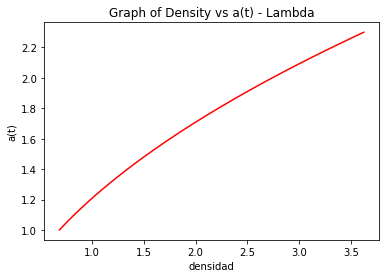

In [ ]:
#Para densidad respecto a a(t) Tenemos:
to=0 
t = np.linspace(to,13700,1000,endpoint = True) #tiempo en intervalo desde la actualidad #10000
e_0=0.6847
e=[]
#y nuestras a(t)
for i in range(len(t)):
  es = e_0*(alambda[i]**2)
  e.append(es)
plt.plot(e,alambda,marker='', color="red")
plt.xlabel("densidad")
plt.ylabel("a(t)")
plt.title("Graph of Density vs a(t) - Lambda")

plt.show()

Now we want our density $\epsilon$ in terms of time, we can take our last equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{2} $

and vary it along some time:

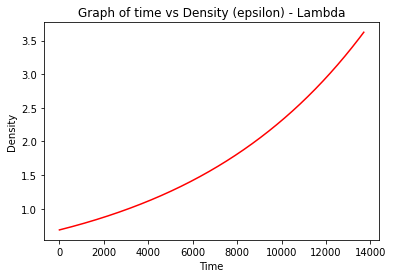

In [ ]:
#We can take our e from last graph:
tt = np.linspace(to,13700,1000,endpoint = True)
#so:
plt.plot(tt,e,marker='', color="red")
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Graph of time vs Density (epsilon) - Lambda")

plt.show()

Finally we have density versus z (redshift), we can take the same equation:

$\epsilon_{m}(a) = \epsilon_{m,0} a^{2} $

And since $ a = \frac{1}{1+z} $
We have:

$ z= (\frac{\epsilon_{m,0}}{\epsilon_{m}})^{1/2} -1  $

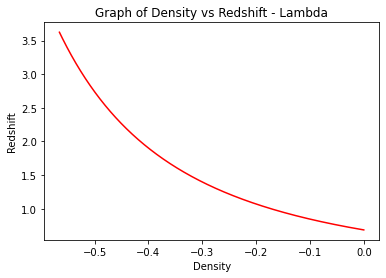

In [ ]:
#We take the same Densitys and now:
zlambda=[]
for i in range(len(e)):
  zi = (e_0/e[i])**(1/2) -1
  zlambda.append(zi)

plt.plot(zlambda,e,marker='', color="red")
plt.xlabel("Density")
plt.ylabel("Redshift")
plt.title("Graph of Density vs Redshift - Lambda")

plt.show()

Same problem, there can't be any negative densities so something wrong happened here. But density seems to decrease with redshift. I would only take into consideration densities above 0, but it seems it tends to cero so again something is wrong beacuse of that behaviour.
But we can take note that the graphs act diffrenetly from the ones of matter and radiation.

We have to remember that a Benchmark universe where matter and radiation are the principal components resembles the real current universe we live in.

# Parte 3

Compute the proper, the luminosity and angular-diameter distance. Make
plots of such quantities for the base cosmology, and for variations of it.
You can get some inspiration by the plots in chapter 5 and 6 of the Barbara
Ryden book.

Vamos a replicar la gráfica 5.9 que viene el universo Benchmark, solo lambda y curvatura 0 y solo materia y curvatura 0.

## Benchmark Model

NOTE: My third attempt was the best of the three, im only going to consider that one.

The proper distance is:

$dp = c\int^{to}_{te} \frac{dt}{a(t)}$

3.3047226804115532e+16
101
101


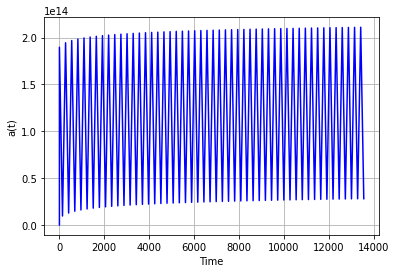

In [ ]:
#Intento1

#Lets retake what we had on step 1
#Como integral:
#Método Composite Simpson #Código nuevamente del mismo libro Numerical Analysis - Burden Faires - 9th Edition
import numpy as np
c= 3e5 #en (km/s) pasaremos los segundos a mega años para coincidir con la primera parte del proyecto.
c=c*3600*1*10**6
a = 0.01
b = 13700
n=100
h=(b-a)/n
f= (c*1/((0.3153/a) + (0.00009/a**2) + (0.6847*a**2))**0.5) + (c*1/((0.3153/b) + (0.00009/b**2) + (0.6847*b**2))**0.5)
XI = [f,0,0]
aX = [0]
xxt=[0]
#xx2 =[]   No lo usé (Intento de eliminar picos)
#xx1=[]    No lo usé (Intento de eliminar picos)
#xx12=[]   No lo usé (Intento de eliminar picos)
#t = np.linspace(0,13700,98,endpoint=True)
for i in range(n):
  X=a+i*h
  if (i%2 == 0):
    XI[2]+= (c*1/((0.3153/X) + (0.00009/X**2) + (0.6847*X**2))**0.5)
    aX.append(XI[2])
    #xx2.append(XI[2])    No lo usé (Intento de eliminar picos)
  else:
    XI[1]+= (c*1/((0.3153/X) + (0.00009/X**2) + (0.6847*X**2))**0.5)
    aX.append(XI[1])
    #xx1.append(XI[1])    No lo usé (Intento de eliminar picos)
  xxt.append(X)
#for i in range(len(xx1)):    No lo usé (Intento de eliminar picos)
 # xx12[i] = xx2[i]-xx1[i]    No lo usé (Intento de eliminar picos)
XIFinal = h*(XI[0] + 2* XI[2] + 4*XI[1])/3
print(XIFinal)

print(len(aX))
print(len(xxt))
plt.xlabel("Time")
plt.ylabel("a(t)")
plt.plot(xxt, aX, 'b-')
#plt.axis([0,10,0,1]) No lo usé (Intento de resize de la gráfica)

plt.grid()
plt.show()

I think I didn't aply correctly the method.

1080000000000000.0
1001
1001


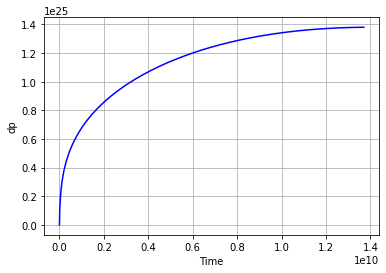

In [ ]:
#Intento2

#We have our a(t) in variable w_a for the benchmark model
#And our time in t_a
c= 3e5 #en (km/s) pasaremos los segundos a mega años para coincidir con la primera parte del proyecto.
c=c*3600*1*10**6
print(c)
dp=[]
for i in range(len(w_a)):
  dpi = c*((1/w_a[i])*t_a[i])
  dp.append(dpi)
print(len(t_a))
print(len(w_a))

plt.xlabel("Time")
plt.ylabel("dp(km)")
plt.plot(t_a, dp, 'b-')
#plt.axis([0,10,0,1]) No lo usé (Intento de resize de la gráfica)

plt.grid()
plt.show()

#I did this because i didn't hace the function of a(t)

I did this because i didn't hace the function of a(t), I only hace solutions of a(t) that produce a graph, since I have only this numbers, i don't know how to apply them to this integral.

I don't know if this is being correctly used since im trying to solve this "numerically".

The proper distance dp(t0) approaches a limiting value dp → 3.20c/H0, in the case of the Benchmark Model.
so dp = 7.253x10^-4 (1/Mpc)

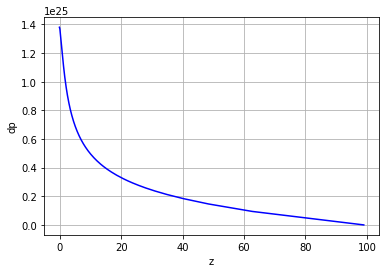

In [ ]:
#Lets put this in terms of z: a=1/(1+z) where z=1/a -1
z_a = []
for i in range(len(w_a)):
  zz= (1/w_a[i])-1
  z_a.append(zz)

######
plt.xlabel("z")
plt.ylabel("dp")
plt.plot(z_a, dp, 'b-')
plt.grid()
plt.show()
#Since we got various numerical solutions to the Benchmark model, I thought maybe this would work

Comparing to the book, we can see clearly that we may have done the propper distance wrong, but z values appear to be right.

Maybe the Simpson composite was done wrong. Maybe the way i thought it may be ok was wrong.

Now with this, let's solve the Luminosity Distance, which is:

$dL = dp(t_{0}) (1+z)$ 

To replicate figure 6.2

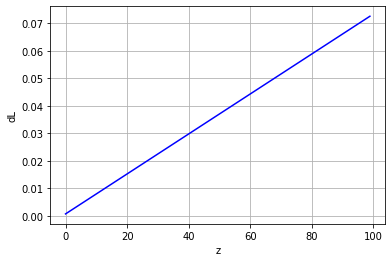

In [ ]:
dl=[]
dp0= 7.253*10**(-4)
for i in range(len(z_a)):
  dli = dp0 * (1+z_a[i])
  dl.append(dli)
######
plt.xlabel("z")
plt.ylabel("dL")
plt.plot(z_a, dl, 'b-')
plt.grid()
plt.show()

Comparing to figure 6.2 of Ryden, the behavior we see is correct, but the values of dL are not the same as the book. I'm beggining to think it´s because of a wrong conversion I've done, maybe of Ho.

Now for the angular distance, we have:

$dA = \frac{dL}{1+z}$

Note: We aren't using the expanded form. (Maybe we should use it?)

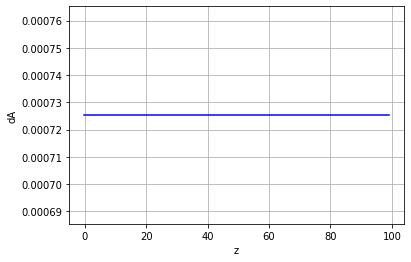

In [ ]:
dA=[]
dp0= 7.253*10**(-4)
for i in range(len(z_a)):
  dai = dl[i] / (1+z_a[i])
  dA.append(dai)
######
plt.xlabel("z")
plt.ylabel("dA")
plt.plot(z_a, dA, 'b-')
plt.grid()
plt.show()

### Intento 3 - Benchmark

The proper distance is:

$dp = c\int^{to}_{te} \frac{dt}{a(t)}$

This is what we are trying to solve

1.480350346638538e+21
1001
1001
1356.30901


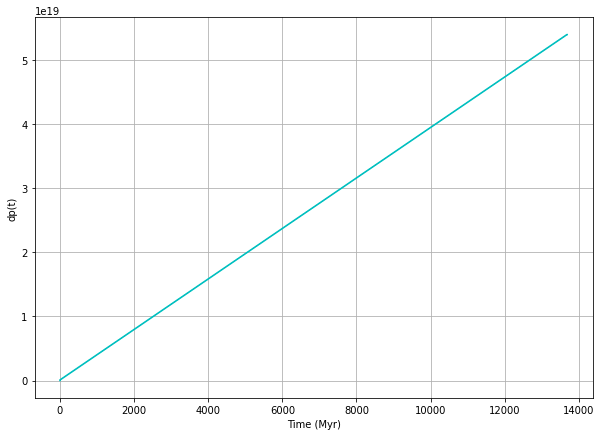

In [205]:
###Intento 3 con el polinomio
# polireal =5.89577106202795e-110*x**11 - 5.54363272537958e-99*x**10 + 2.29617608373555e-88*x**9 - 5.49998169983441e-78*x**8 + 8.40549662958777e-68*x**7 - 8.52834400734695e-58*x**6 + 5.794987938611e-48*x**5 - 2.6023177394379e-38*x**4 + 7.50628905696984e-29*x**3 - 1.36497459197923e-19*x**2 + 2.32041873001947e-10*x + 0.01
# Este polinomio lo generamos para a(t)
#Método Composite Simpson #Código nuevamente del mismo libro Numerical Analysis - Burden Faires - 9th Edition
import numpy as np
c= 3e5 #en (km/s) pasaremos los segundos a mega años para coincidir con la primera parte del proyecto.
c=c*3600*1*10**6 #(km/Myr)
a = 0.01
b = 13700
n=1000
h=(b-a)/n
f1 = c*(1/(5.89577106202795e-110*a**11 - 5.54363272537958e-99*a**10 + 2.29617608373555e-88*a**9 - 5.49998169983441e-78*a**8 + 8.40549662958777e-68*a**7 - 8.52834400734695e-58*a**6 + 5.794987938611e-48*a**5 - 2.6023177394379e-38*a**4 + 7.50628905696984e-29*a**3 - 1.36497459197923e-19*a**2 + 2.32041873001947e-10*a + 0.01))  
f2 = c*(1/(5.89577106202795e-110*b**11 - 5.54363272537958e-99*b**10 + 2.29617608373555e-88*b**9 - 5.49998169983441e-78*b**8 + 8.40549662958777e-68*b**7 - 8.52834400734695e-58*b**6 + 5.794987938611e-48*b**5 - 2.6023177394379e-38*b**4 + 7.50628905696984e-29*b**3 - 1.36497459197923e-19*b**2 + 2.32041873001947e-10*a + 0.01))  
f= f1 + f2 
XI = [f,0,0]
dpBench = [0]
dptBench=[0]
for i in range(n):
  X=a+i*h
  if (i%2 == 0):
    XI[2]+= c*(1/(5.89577106202795e-110*X**11 - 5.54363272537958e-99*X**10 + 2.29617608373555e-88*X**9 - 5.49998169983441e-78*X**8 + 8.40549662958777e-68*X**7 - 8.52834400734695e-58*X**6 + 5.794987938611e-48*X**5 - 2.6023177394379e-38*X**4 + 7.50628905696984e-29*X**3 - 1.36497459197923e-19*X**2 + 2.32041873001947e-10*X + 0.01))  
    dpBench.append(XI[2])
  else:
    XI[1]+= c*(1/(5.89577106202795e-110*X**11 - 5.54363272537958e-99*X**10 + 2.29617608373555e-88*X**9 - 5.49998169983441e-78*X**8 + 8.40549662958777e-68*X**7 - 8.52834400734695e-58*X**6 + 5.794987938611e-48*X**5 - 2.6023177394379e-38*X**4 + 7.50628905696984e-29*X**3 - 1.36497459197923e-19*X**2 + 2.32041873001947e-10*X + 0.01)) 
    dpBench.append(XI[1])
  dptBench.append(X)
  
XIFinal = h*(XI[0] + 2* XI[2] + 4*XI[1])/3
print(XIFinal) #Area bajo la curva

print(len(dpBench))
print(len(dptBench))
plt.xlabel("Time (Myr)")
plt.ylabel("dp(t)")
plt.plot(dptBench, dpBench, 'c-')

print(dptBench[100])
plt.grid()
plt.show()

1001
1001
1356.30901
99.0


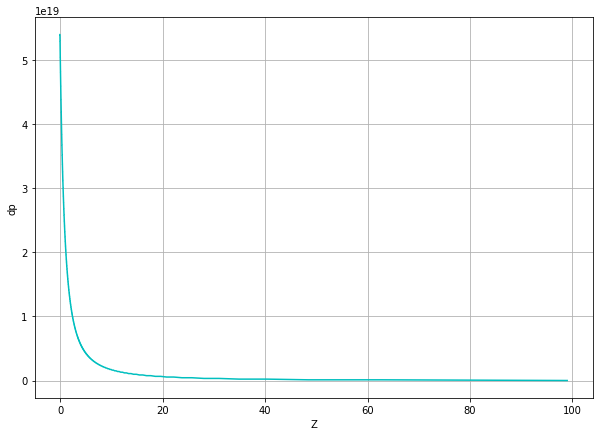

In [206]:
##############################################  For z:
z_aB=[]
for i in range(len(w_a)):
  zaB= (1/w_a[i])-1
  z_aB.append(zaB)
print(len(z_aB))
print(len(dpBench))
plt.xlabel("Z")
plt.ylabel("dp")
plt.plot(z_aB, dpBench, 'c-')
print(dptBench[100])
print(z_aB[0])
plt.grid()
plt.show()

Ignoring the errors this aproximates to a linear increment, which looks like the one from figure

The Luminosity Distance is:

$dL = dp(t_{0}) (1+z)$ 

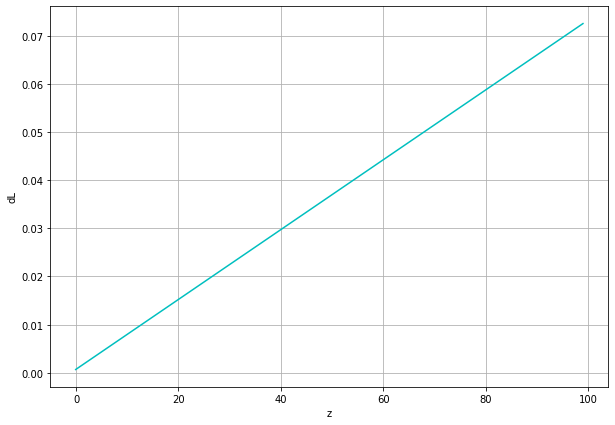

In [207]:
####Now for dL
dlB=[]
dp0B= 7.253*10**(-4) #del libro
z_aB=[]
for i in range(len(w_a)):
  zaB= (1/w_a[i])-1
  z_aB.append(zaB)
  dli = dp0B * (1+z_aB[i])
  dlB.append(dli)
######
plt.xlabel("z")
plt.ylabel("dL")
plt.plot(z_aB, dlB, 'c-')
plt.grid()
plt.show()

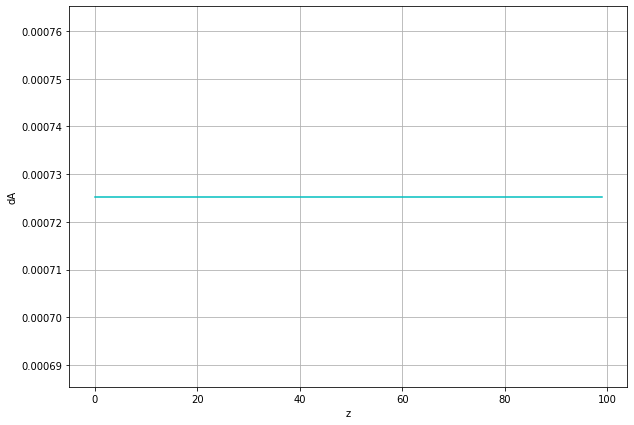

In [208]:
##### Angular distance:
dAB=[]
dp0= 7.253*10**(-4)
for i in range(len(z_aB)):
  dai = dlB[i] / (1+z_aB[i])
  dAB.append(dai)
######
plt.xlabel("z")
plt.ylabel("dA")
plt.plot(z_aB, dAB, 'c-')
plt.grid()
plt.show()

## Only matter

The proper distance is:

$dp = c\int^{to}_{te} \frac{dt}{a(t)}$

Where a(t) is 

$a(t) = (\frac{t}{t_{0}})^{2/3}$

Solving the integral, we have:
$dp = 3 C to^{2/3} (to^{1/3} - te^{1/3})$

100


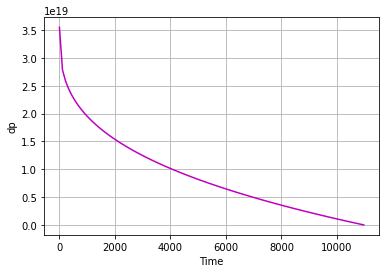

In [ ]:
c= 3e5 #en (km/s) pasaremos los segundos a mega años para coincidir con la primera parte del proyecto.
c=c*3600*1*10**6
Ho = h_0/(3.086e19)
to=2/(3*Ho)
tmat = np.linspace(0,2/(3*Ho),100,endpoint = True) #tiempo en intervalo hasta la actualidad
#print(c)
dpmat=[]
for i in range(len(tmat)):
  dpi = 3*c*to**(2/3)*(to**(1/3)-tmat[i]**(1/3))
  dpmat.append(dpi)

print(len(dpmat))
plt.xlabel("Time")
plt.ylabel("dp")
plt.plot(tmat, dpmat , 'm-')
plt.grid()
plt.show()

Now with this, let's solve the Luminosity Distance, which is:

$dL = dp(t_{0}) (1+z)$ 

To replicate figure 6.2

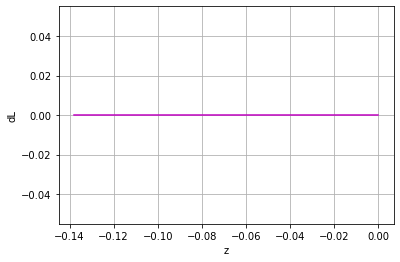

In [ ]:
dlmat=[]
dp0= dpmat[99]
for i in range(len(zmat)):
  dli = dp0 * (1+zmat[i])
  dlmat.append(dli)
######
plt.xlabel("z")
plt.ylabel("dL")
plt.plot(zmat, dlmat, 'm-')
plt.grid()
plt.show()

It shouldn´t have this behaviour and z's are wrong, we saw from the part 2.  This should have like a curve going up. Once we finish I may get to see a possiblity of why it´s wrong.

Now for the angular distance, we have:

$dA = \frac{dL}{1+z}$

Note: We aren't using the expanded form.

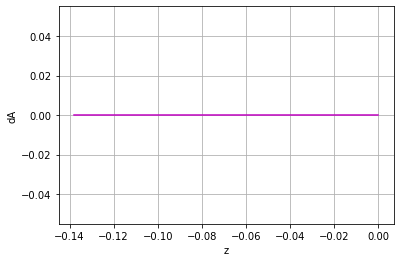

In [ ]:
dAmat=[]
dp0= dpmat[99]
for i in range(len(zmat)):
  dai = dlmat[i] / (1+zmat[i])
  dAmat.append(dai)
######
plt.xlabel("z")
plt.ylabel("dA")
plt.plot(zmat, dAmat, 'm-')
plt.grid()
plt.show()

dA(z) = 0 in a matter only universe sounds so wrong. I still can´t figure out the error

## Only lambda Universe

The proper distance is:

$dp = c\int^{to}_{te} \frac{dt}{a(t)}$

Where a(t) is 

$a(t) = e^{Ho(t-to)} $

Solving the integral, we have:
$dp = -C e^{-Ho(te-to)}$

I think we can use equation 5.74 and 5.75
$dp(to) = \frac{C}{Ho}z$

and

$dp(te) = \frac{C}{Ho}\frac{z}{1+z}$

1000


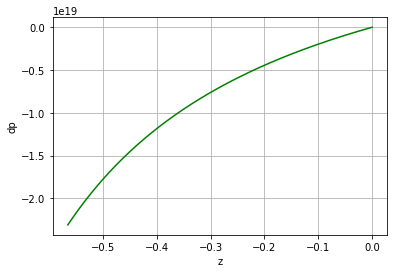

In [ ]:
c= 3e5 #en (km/s) pasaremos los segundos a mega años para coincidir con la primera parte del proyecto.
c=c*3600*1*10**6
Ho = h_0/(3.086e19) #Megaños donde to=13700Myr
tlambda = np.linspace(0,13700,100,endpoint = True) #tiempo en intervalo hasta la actualidad
#print(c)
dplambda=[]
for i in range(len(zlambda)):
  dpi = (c/Ho)*(zlambda[i]/(1+zlambda[i]))
  dplambda.append(dpi)

print(len(zlambda))
plt.xlabel("z")
plt.ylabel("dp")
plt.plot(zlambda, dplambda , 'g-')
plt.grid()
plt.show()

I think this is right, since i´m talking about the past (begining of the universe) thats why z and distances are negative.

Now with this, let's solve the Luminosity Distance, which is:

$dL = dp(t_{0}) (1+z)$ 

To replicate figure 6.2

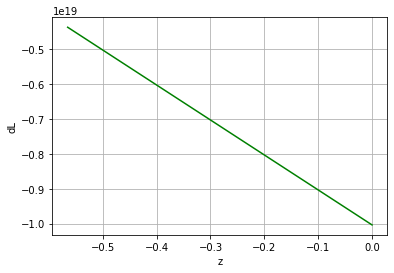

In [ ]:
dllambda=[]
dp0= (c/Ho)*zlambda[999]
for i in range(len(zlambda)):
  dli = dp0 * (1+zlambda[i])
  dllambda.append(dli)
######
plt.xlabel("z")
plt.ylabel("dL")
plt.plot(zlambda, dllambda, 'g-')
plt.grid()
plt.show()

Now for the angular distance, we have:

$dA = \frac{dL}{1+z}$

Note: We aren't using the expanded form.

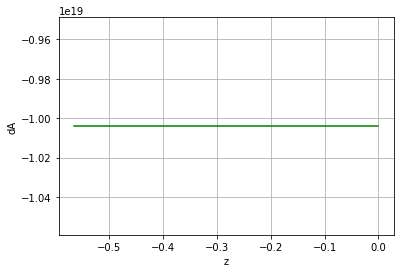

In [ ]:
dAlambda=[]
dp0= (c/Ho)*zlambda[999]
for i in range(len(zlambda)):
  dai = dllambda[i] / (1+zlambda[i])
  dAlambda.append(dai)
######
plt.xlabel("z")
plt.ylabel("dA")
plt.plot(zlambda, dAlambda, 'g-')
plt.grid()
plt.show()

# Parte 4

In particular use the Luminosity distance to compute the distance modulus
μ = 5 log10( dL
1Mpc + 25) and compare it against the data provided here:
https://supernova.lbl.gov/Union/figures/SCPUnionmuvsz.txt.
You can find more information about this data 

In [ ]:
#Please cite "Kowalski et al. (The Supernova Cosmology Project), Ap.J., 2008."  If the Union compilation is included in any other data sets that are distributed, please include this citation request there too.
#Best fit M (h = 0.70) -19.3002
#Best fit alpha 1.2384
#Best fit beta 2.2811


#####First try reading documents 
with open('SCPUnion_mu_vs_z.txt') as f:
    contents = f.read()
    print(contents)

In [ ]:
lines = []
with open('SCPUnion_mu_vs_z.txt') as f:
    lines = f.readlines()

count = 0
for line in lines:
    count += 1
    print(f'line {count}: {line}')    

In [63]:
result=[]
for x in lines: 
  #x.replace("\n", "")
  result.append(x.replace("\n", "").split('\t'))
  #result.append(x.split('\n'))
    
#for i in result:
  # result.replace("\n", "")
print(result[0])

for i in range(len(result)):
  result[i] = list(map(float, result[i][1:]))

print(result[0][0]) #Para verificar

['1993ag', '0.050043', '36.7730018543', '0.153148680782']
0.050043


In [67]:
Zdatos=[]
for i in range(len(result)):
  zi = result[i][0]
  Zdatos.append(zi)
print(Zdatos)

[0.050043, 0.052926, 0.02513, 0.070086, 0.062668, 0.087589, 0.078577, 0.017227, 0.042233, 0.045295, 0.019599, 0.100915, 0.027342, 0.074605, 0.026489, 0.049922, 0.030604, 0.016345641, 0.0154363, 0.030529, 0.024525, 0.023953, 0.026038, 0.048948, 0.024314, 0.015166, 0.03572, 0.048818, 0.0219800059146, 0.0275, 0.1244, 0.036, 0.01673, 0.016321, 0.021793, 0.01645, 0.023208, 0.036457, 0.019264, 0.017605, 0.031528, 0.023536, 0.016743, 0.05371, 0.016991, 0.027865, 0.017173, 0.029955, 0.016559, 0.015, 0.0544, 0.1561, 0.0393, 0.1241, 0.1441, 0.1299, 0.0784, 0.62, 0.57, 0.3, 0.38, 0.43, 0.24, 0.3, 0.24, 0.44, 0.5, 0.97, 0.479, 0.83, 0.416, 0.581, 0.45, 0.579, 0.32, 0.657, 0.472, 0.374, 0.526, 0.763, 0.58, 0.43, 0.45, 0.828, 0.656, 0.495, 0.49, 0.57, 0.388, 0.45, 0.48, 0.615, 0.4, 0.655, 0.498, 0.465, 0.453, 0.425, 0.278, 0.477, 0.95, 1.057, 0.816, 0.455, 0.514, 0.423, 0.946, 0.859, 1.031, 0.936, 0.528, 0.645, 0.978, 0.885, 0.815, 0.568, 0.711, 0.3396, 0.3965, 0.812, 0.799, 0.882, 0.833, 0.874, 0.7

In [68]:
Mudatos=[]
for i in range(len(result)):
  Mui = result[i][1]
  Mudatos.append(Mui)
print(Mudatos)

[36.7730018543, 36.8241423261, 35.1678175291, 37.567740156, 37.5515804571, 38.1915656352, 37.5212710132, 34.6546665523, 36.3586532798, 36.6566139461, 34.5182384466, 38.5088119689, 35.2300574166, 37.6663645268, 35.5199700817, 36.6999653546, 35.5404531616, 34.0924538801, 34.0329851021, 35.5818149937, 34.9577174302, 34.935520479, 35.3566237332, 36.6391120177, 35.0794913195, 34.2041114924, 36.1050539158, 36.3507343053, 34.8811235819, 35.6735856723, 38.9521645786, 35.8260342723, 34.1592687583, 34.1144805357, 34.9048499767, 34.1818298266, 35.117280195, 36.1142750974, 35.1559953619, 34.3943547917, 35.7346061594, 35.1870287376, 33.8878121745, 36.4559044522, 34.2677976869, 35.0340198507, 34.1860410198, 35.9589514911, 34.3764044862, 34.0959952821, 36.9686138698, 39.294455039, 36.3055280023, 38.8100134766, 39.0528219919, 38.9956124177, 37.7810061412, 43.2066240148, 42.6299495836, 40.9068557079, 41.981448045, 42.2865323661, 40.92039446, 40.152454556, 40.8941528415, 42.0189541221, 42.4251183643, 43

In [69]:
ErrorMudatos=[]
for i in range(len(result)):
  EMui = result[i][2]
  ErrorMudatos.append(EMui)
print(ErrorMudatos)

[0.153148680782, 0.148454214927, 0.165420933733, 0.15403068043, 0.145317136417, 0.159495013964, 0.147429338762, 0.1880259565, 0.152312134352, 0.148758275509, 0.179081303451, 0.145279087383, 0.171939536277, 0.147931348064, 0.182864910719, 0.146530609404, 0.161624590233, 0.144775220876, 0.150597548663, 0.0920067053122, 0.109085696057, 0.115625212493, 0.106784897071, 0.1766982111, 0.18643839963, 0.225518080121, 0.188094161827, 0.166961986591, 0.196258768364, 0.181507304221, 0.168017789501, 0.173778570484, 0.209352704395, 0.209884301455, 0.282608881266, 0.292212075551, 0.276622195571, 0.267250650207, 0.285695464272, 0.308882749558, 0.270713039098, 0.278885118559, 0.292567467485, 0.268351164818, 0.290910806654, 0.273008042132, 0.293258906218, 0.273866480307, 0.292368203484, 0.145904476604, 0.0771934613908, 0.0599663857105, 0.0717497761757, 0.0715971658275, 0.0634435595707, 0.0631822941145, 0.0681153647931, 0.374321656282, 0.329397155099, 0.322661461524, 0.294675002057, 0.353944288913, 0.604

From our data:
We have the equation:

$\mu=5\log_{10}(\frac{d_L}{1 {\rm Mpc}}+25)$

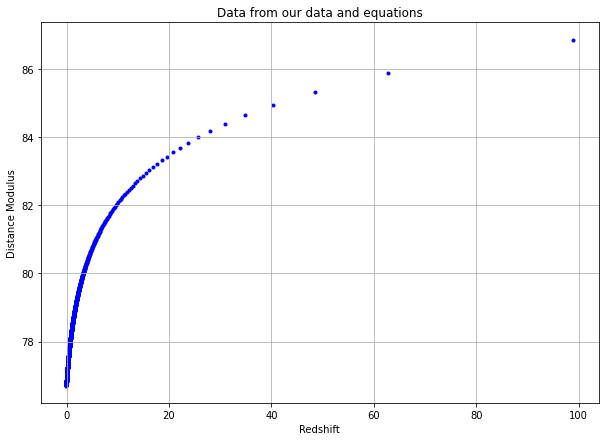

In [194]:
import math
#C estaba en km/Myr asi que convertiremos los km a Mpc
#Por lo que en la ecuación en lugar de 1Mpc = 3.086e+19
Mu_dLB=[]
for i in dlB:
  Mu_dL = 5 * math.log10((i/3.08*10**19)+25) 
  Mu_dLB.append(Mu_dL)
plt.scatter(z_aB,Mu_dLB,marker='.', color="b")
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title("Data from our data and equations")
plt.show()

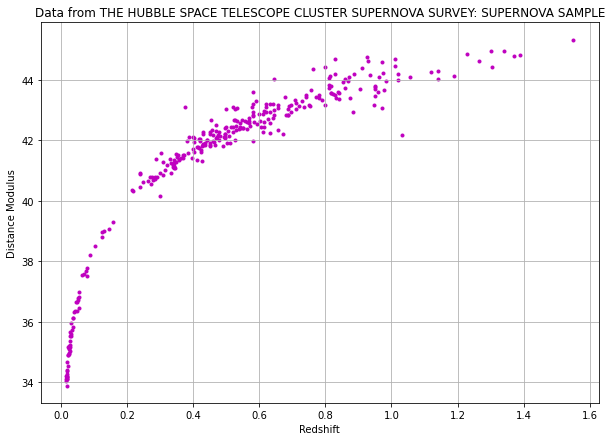

In [193]:
from IPython.core.pylabtools import figsize
fig= plt.scatter(Zdatos,Mudatos,marker='.', color="m")
fig= figsize(10,7)
#plt.axis([0,15,0,15])
plt.grid()
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title("Data from THE HUBBLE SPACE TELESCOPE CLUSTER SUPERNOVA SURVEY: SUPERNOVA SAMPLE")
plt.show()

#The only pretty graph